<img src="tmdb.png" align="center">

<h2 align="center">TMDB MOVIE DATA ANALYSIS AND PREDECITNG THE MODEL</h2>

- Introduction
- Data Set
- Projejct Objective
- Project  Methodlogy
- Software Needed
- Loading the Data and Importing Libraries
- Gathering Data
- Exploratory Data Analysis
- Featured Engineering
- Conclusion


## <font color='brown'>Introduction</font>

In a world... where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. But what movies make the most money at the box office? How much does a director matter? Or the budget? For some movies, it's "You had me at 'Hello.'" For others, the trailer falls short of expectations and you think "What we have here is a failure to communicate."

From business point of view, one of the main interests of the film studios and its related stakeholders is a prediction of revenue that a new movie can generate based on a few given input attributes before its released date.

## <font color='brown'>Data Set</font>

This dataset taken from Kaggle,  are provided with 3000 movies and a variety of metadata obtained from The Movie Database (TMDB). Movies are labeled with id. Data points include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries. [Source](https://www.kaggle.com/zero92/tmdb-prediction/data) file name train.csv

## <font color='brown'>Project Objective</font>

The primary goal is to build a machine-learning model to predict the revenue of a new movie given such features as budget, release dates, genres. The modeling performance is evaluating based on the Rsquare.

The secondary goal is to practice skills data wrangling, data visualization, Random forest, Linear Regression,LGB boost, GB regressor

## <font color='brown'>Project Methodlogy</font>

This project has 4 high-level steps:

* Step 1: Data acquisition which we have extracted for TMDB data set.

* Step 2: data exploratory analysis and features engineering explore and visualize the data to have an overview with-in and between the variables, what’s insights gained and what’s new features added in. 
* Step 3: modeling experiments design and conduct a set of experiments to evaluate performance and select machine learning method, compare and select features selection approach.

* Step 4: final evaluate the model on the validation set using R Square.

## <font color='brown'>Software Needed</font>

Software: Python and Jupyter Notebook

The following packages (libraries) need to be installed:

1. pandas
2. NumPy
3. scikit Learn
4. wordcount
5. eli5
6. TFID
7. LGB boost
8. GB regressor


## <font color='brown'>Loading the Data and Importing Libraries</font>

In [2]:
import numpy as np
import pandas as pd
import sklearn
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn import model_selection # for splitting into train and test
import json
import ast
from urllib.request import urlopen
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import eli5
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
print('Libraries imported..')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\python\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.



Libraries imported..


## <font color='brown'>**Gathering Data**</font>

In [3]:
#loading the data set
df = pd.read_csv("data/train.csv")
#displaying top 5 data set
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
#printing out column
#for col in df.columns:
    #print(col)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [5]:
# get number of rows and columns
df.shape

(3000, 23)

In [6]:
#finding null value
df.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [7]:
#Let's find duplicate data set
df.duplicated().sum()

0

In [8]:
df.isna().sum().sum()

5601

In [9]:
#df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
Name: release_date, dtype: object

In [10]:
 # statistical description, only for numeric values
df.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [11]:
df.corr()

,id,budget,popularity,runtime,revenue
id,1.000000,0.019732,-0.007470,0.010750,0.000610
budget,0.019732,1.000000,0.342356,0.238373,0.752965
popularity,-0.007470,0.342356,1.000000,0.133690,0.461460
runtime,0.010750,0.238373,0.133690,1.000000,0.216380
revenue,0.000610,0.752965,0.461460,0.216380,1.000000


In [12]:
# Checking for an zero values in the budget and revenue columns
print("Rows With Zero Values In The Budget Column:",df[(df['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",df[(df['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 812
Rows With Zero Values In The Revenue Column: 0


The budget column those has zero value will be replaced with suitable value later duing our analysis purpose.

## <font color='brown'>**Exploratory Data Analysis**</font>


We know that reveune is continous data there we will be using regression method. Regression method is used in column to predict particular to look distribution of target variable.

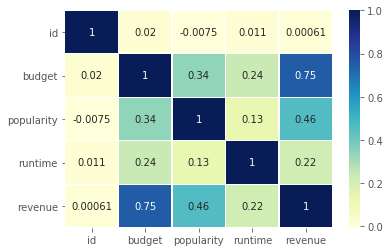

In [13]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);

From this corr chart we can see that revenue is strongly correlated with budget where as least correlated  runtime.

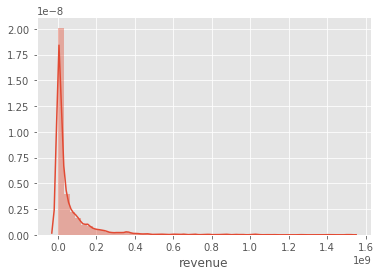

In [15]:
sns.distplot(df.revenue);

We can see that this data is very skewed and therefore it is difficult to draw conclusion from this graph.we knew to normalise this data.

<font color='blue'>**Introducing log**</font>


Why skewed data is not good fit for modeling in Linear Regression ?

* Because they may act as an outlier ,and we know that outlier is not good for our model performance.
* They have un even mean,median , mode and by law of large number, normal distribution allows the researcher to make more accurate predictions.
* To linearize the fit as much as possible.
Statistical test are usually based on the assumption of normality(normal distribution).

The log transformation, a widely used method to address skewed data, is one of the most popular transformations used in research.There fore we will be using log transformation in reveune.



In [16]:
#creating log transformation for reveune
df['log_revenue'] = np.log1p(df['revenue']) #we are not using log0 to avoid & and null value as there might be 0 value

Text(0.5, 1.0, 'Distribuition of Revenue(log transformation)')

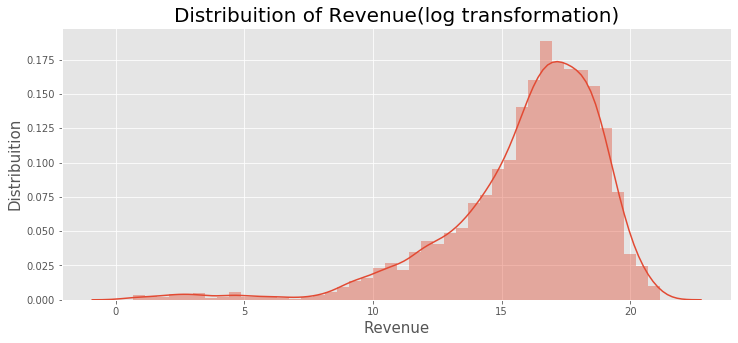

In [17]:
plt.figure(figsize=(12,5))

# Subplot allow us to plot more than one 
# in this case, will be create a subplot grid of 2 x 1

# seting the distribuition of our data and normalizing using np.log on values highest than 0 and + 
# also, we will set the number of bins and if we want or not kde on our histogram
ax = sns.distplot(df['log_revenue'])
ax.set_xlabel('Revenue', fontsize=15) #seting the xlabel and size of font
ax.set_ylabel('Distribuition', fontsize=15) #seting the ylabel and size of font
ax.set_title("Distribuition of Revenue(log transformation)", fontsize=20) #seting the title and size of font

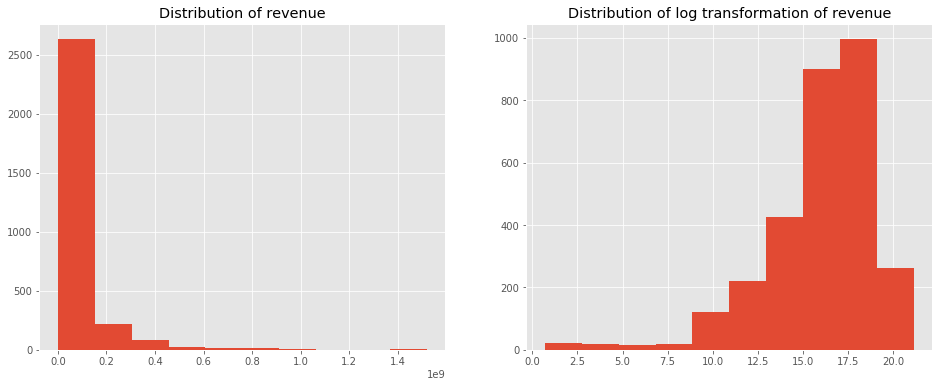

In [18]:
#comapring distribution of reveune and log revune side by side with histogram
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1) #1 means 1 plot, 2 means column and 1 mean 1 sub plot
plt.hist(df['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)#1 means 1 plot, 2 means column and 2 mean second sub plot
plt.hist(df['log_revenue']);
plt.title('Distribution of log transformation of revenue');

We can see that orginal distribution i.e (one without log) is extremely skewed. We used log transformation method and made data normally distribution which has less skeweness and kurtosis.

<font color='blue'>**Relationship between Film Revenue and Budget**</font>

Let's find correlation between revenue and budget. Let's also find the degree of co-relation.

In [19]:
#log transformation of budget
df['log_budget'] = np.log1p(df['budget'])

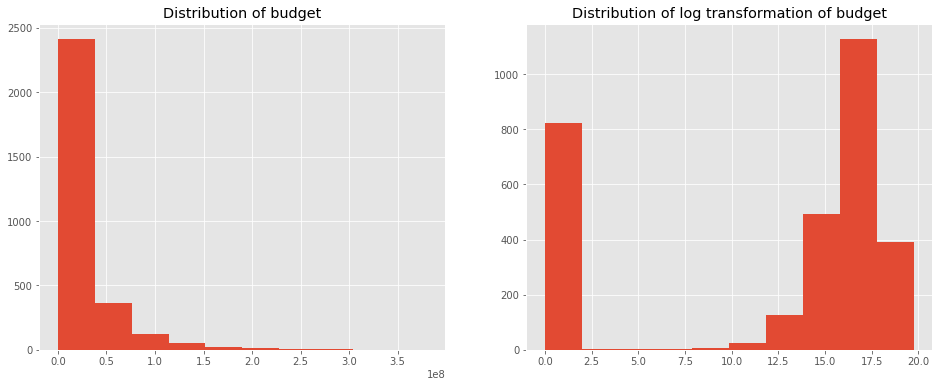

In [21]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(df['budget']);
plt.title('Distribution of budget');
plt.subplot(1, 2, 2)
plt.hist(df['log_budget']);
plt.title('Distribution of log transformation of budget');

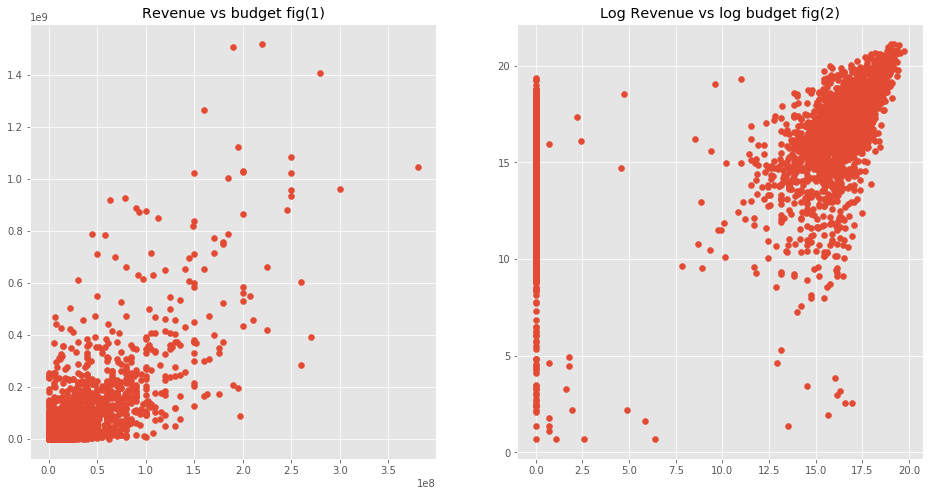

In [22]:
#let's create scatter plot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(df['budget'], df['revenue'])
plt.title('Revenue vs budget fig(1)');
plt.subplot(1, 2, 2)
plt.scatter(df['log_budget'], df['log_revenue'])
plt.title('Log Revenue vs log budget fig(2)');

Fig(1) : we can see that they are some what correlation beween budget and revenue, but we are not clear.

Fig(2) how ever indicates that there is correlation between both variable that is log transformation of reveune and log transformation of budget.

We can also see many movies on zero budget as we identified there were 815 movie that has zero budget which we will clear later.

<font color='blue'>**Is there any relationship with Homepage and Revenue?**</font>

Let's find out the correlation between two variable. We are more interested on answering if having official homepage for movie affects Reveune or not.

We all know that home page will be unique for each movie. Means differnet movie has different home page except the movie that has sequel/prequel. 

In [23]:
#lets check if movies website has count less than 1( means unique) or more than 1( means repeatetive) or not.
df['homepage'].value_counts().head(10)

http://www.transformersmovie.com/                                             4
http://www.lordoftherings.net/                                                2
http://www.thehobbit.com/                                                     2
http://marvel.com/avengers_movie/                                             1
http://www.ballsoffury.com/                                                   1
http://www.blankcityfilm.com/                                                 1
http://www.dorothyofozthemovie.com/                                           1
https://www.bankside-films.com/screeners/ashby.html#                          1
http://www.antitrustthemovie.com/                                             1
http://bcdfpictures.com/index.php?projects/peace-love-and-misunderstanding    1
Name: homepage, dtype: int64

we can see that transformers movies web page is listed 4 times which is obivous because we are all aware that this movie has seque. Same goes with lord of the rings and hobits.

Let's find if having home page affects revenue or not. And for that lets first find out movies has home page or not.

In [24]:
#let's creat column called has_homepage and pass two value 1,0 (1, indicates has home page, 0 indicates no page)
df['has_homepage'] = 0
df.loc[df['homepage'].isnull() == False, 'has_homepage'] = 1 #1 here means it has home page


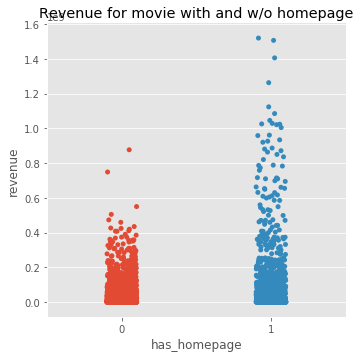

In [25]:
#since has_homepage is categorical value we will be using seaborn catplot.
sns.catplot(x='has_homepage', y='revenue', data=df);
plt.title('Revenue for movie with and w/o homepage');

From the above fig we can see that movie that has home page (indicated by blue) has more revenue compared to the movie that has no home page. From this scatterplot we can say that they may be correlated.

<font color='blue'>**Langauge distribution vs mean reveune**</font>

Let's find out the relationship between language and revenue .We will be calcualting top 10 langauge from the data frame and will be selecting langauage which is in df orginale_langauge. Here we will be using box plot as box plot is very useful for identifying outlier.

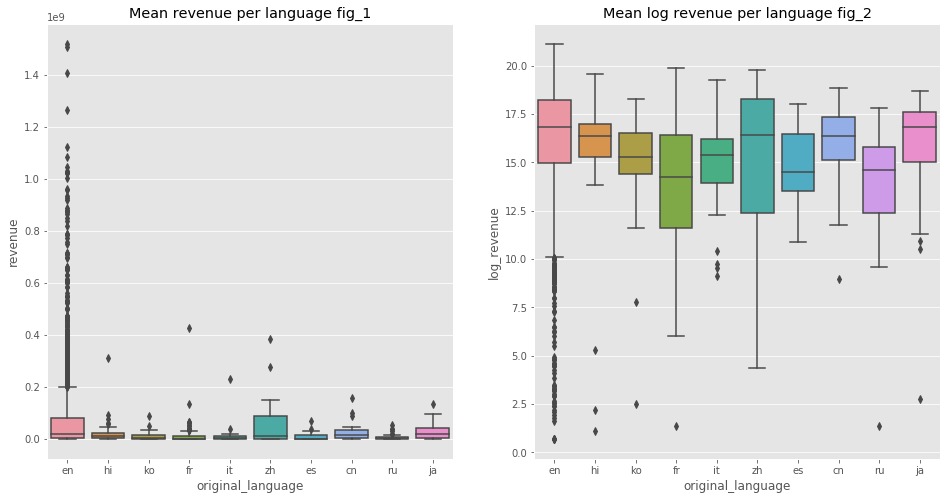

In [26]:
#we will be using blox pot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y='revenue', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]);
plt.title('Mean revenue per language fig_1');
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='log_revenue', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]);
plt.title('Mean log revenue per language fig_2');

> From the fig_1 we can see that x-axis indicated langaue plotted. We can see that english language has higher revenue by far margin compared to toher lagnguage. This graph also says us that english language over shadowed all other language in terms of revenue. This information may be quite incorrect and mis leading. Lets see fig_2 for more details

>From the fig_2 : We can see that orginal langauge vs log transformation of revenue and we can see that other language are also creating revenue near english language . How ever it's english language movie that is leading.

<font color='blue'>**What are the frequent Words in Film Titles and Discriptions ?**</font>


This is one of my favourite part of this analysis. I am very curious  to know the popular film titles also wanted to know if  description/synopsis affects revenue or not.

We will be using wordcount library. Word cloud is data visualization technique used for representaion of text data in which size of each word indicates it frequency or importance.

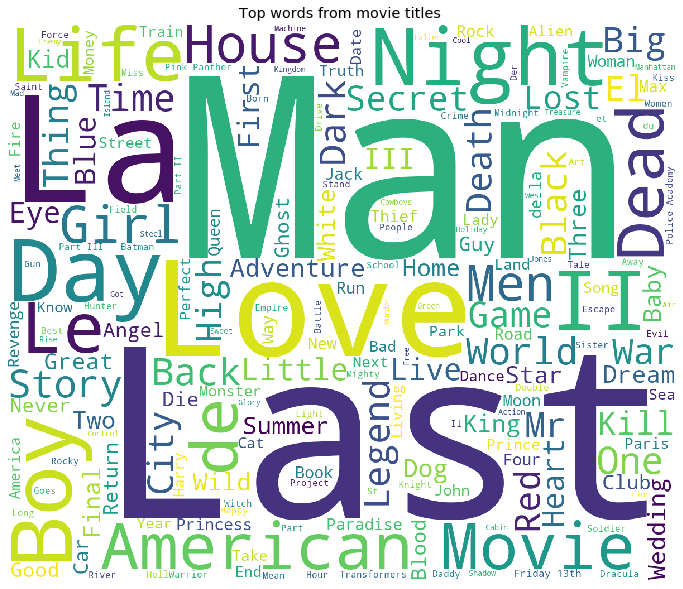

 Time taken to complete this operation is 5.02456259727478 seconds


In [27]:
#let's find top words from movie Titles
start = time.time()
plt.figure(figsize = (12, 12))
token_title = ' '.join(df['original_title'].values) #create split to title by sprace to extract the text.
#bg color set to white for good contrast, by default bg color is darker
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(token_title)
plt.imshow(wordcloud)
plt.title('Top words from movie titles ')
plt.axis("off") # we dont need axes for this
plt.show()
print(" Time taken to complete this operation is", time.time() - start, 'seconds')

We can see that the most popular word are Man,Last, La and so on. The most popular or frequent words are in bigger in size.

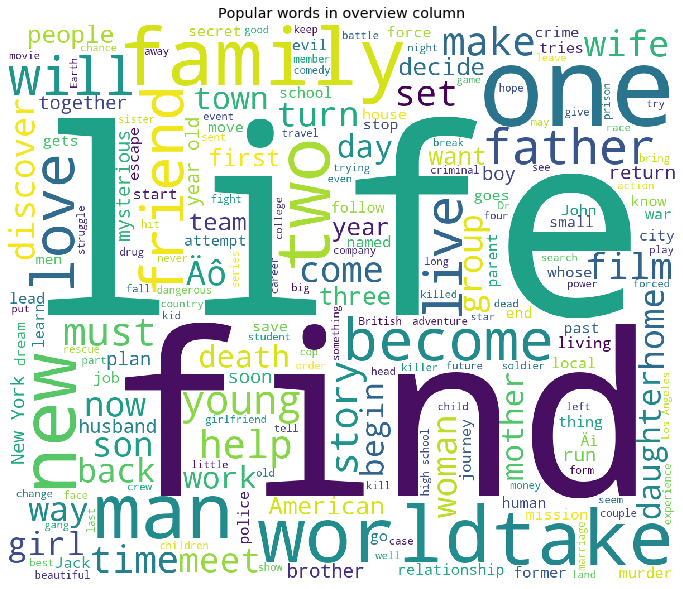

 Time taken to complete this operation is 5.240977764129639 seconds


In [28]:
#let's find the popular words from overview coulumn
start = time.time()
plt.figure(figsize = (12, 12))
text = ' '.join(df['overview'].fillna('').values) #fill the values with empty string if there is no value in it.
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Popular words in overview column')
plt.axis("off")
plt.show()
print(" Time taken to complete this operation is", time.time() - start, 'seconds')

Larger words means frequent occuring words. We can see that life, find,one and so on are most popular words in movie description.

<font color='blue'>**Does the film description affects revenue**</font>

Let's find out if there is any link between words and revenue. Does the word in description affects revenue?

For this approach we will be using linear regression method . Yes linear regression for string data and we can achieve this by using TFID vector.


* TFID helps tp transforms text to feature vectors that can be used as input to estimator.
* TFID is numerical represenation of frequency of words around data description.

We will fit a linear regression model to this data to predict revenue generate. For this we will be using eli5 pacakge which helps to debug Machine learning classifier and also helps us to explain the prediction.So that it wil be easier to find which words affect revenue.




In [29]:
vectorizer = TfidfVectorizer(
            sublinear_tf=True,
            analyzer='word',
            token_pattern=r'\w{1,}',
            ngram_range=(1, 2),
            min_df=5)

overview_text = vectorizer.fit_transform(df['overview'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text, df['log_revenue'])
eli5.show_weights(linreg, vec=vectorizer, top=20, feature_filter=lambda x: x != '<BIAS>')

We can see that words in description can have both positve and negative impacts on revenue. Words like to, bombing ,complication has positive impact and words like politicina,18, violence has negative impact on revenue.

In [30]:
print('Target value:', df['log_revenue'][1000])
eli5.show_prediction(linreg, doc=df['overview'].values[1000], vec=vectorizer)

Target value: 16.44583954907521


We can see that words in title can have both positve and negative impacts on revenue. Words like don,t age, the secret adn so on  has positive impact and words like death, she, land, hell and so on from movie titles has negative impact.

## <font color='brown'>**Featured Engineering**</font>


Issue with release_date is its not in right format so we need to standarlize using pandas date time format.

In [31]:
df.loc[df['release_date'].isnull() == False, 'release_date'].head() #to see if release date has null value.

0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
Name: release_date, dtype: object

<font color='blue'>fixing date column</font>

In [32]:
def fix_date(x):
    '''
    if the value of date here is less than
    or equal to 19 we can prepend 20 infront of this
    to say that movie is from 2000s
    else we can prepend 19 to say that the movie is
    from 1900s
    '''
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

In [33]:
df['release_date'] = df['release_date'].apply(lambda x: fix_date(x)) #applying lambda function

In [34]:
#let's create additional column like Year, month, week, quarter
df['release_date'] = pd.to_datetime(df['release_date']) #converting into panda date time
df['release_date'].head()

0   2015-02-20
1   2004-08-06
2   2014-10-10
3   2012-03-09
4   2009-02-05
Name: release_date, dtype: datetime64[ns]

In [35]:
def process_date(df_date):
    '''this function add column like 
     year, weeekday, month and so on column
    and add prefix of release_date before 
    all the above column eg realease_date_year'''
    date_parts = ["year", "weekday", "month", 'weekofyear', 'day', 'quarter']
    for part in date_parts:
        part_col = 'release_date' + "_" + part #add prefix as  "release_date" before the columne
        df[part_col] = getattr(df['release_date'].dt, part).astype(int)
    
    return df_date

In [36]:
df = process_date(df)

In [37]:
# Count no.of films released per year and sort the years in ascending order
# Do this for both Train and Test Sets
d1 = df['release_date_year'].value_counts().sort_index()


# x values are years, and y values are movie counts, name=legend
data = go.Scatter(x=d1.index, y=d1.values, name='movies data')

layout = go.Layout(title = "Number of films per year", xaxis_title = 'Release date in Year',yaxis_title = 'Movie Count')
py.iplot(dict(data=data, layout=layout))


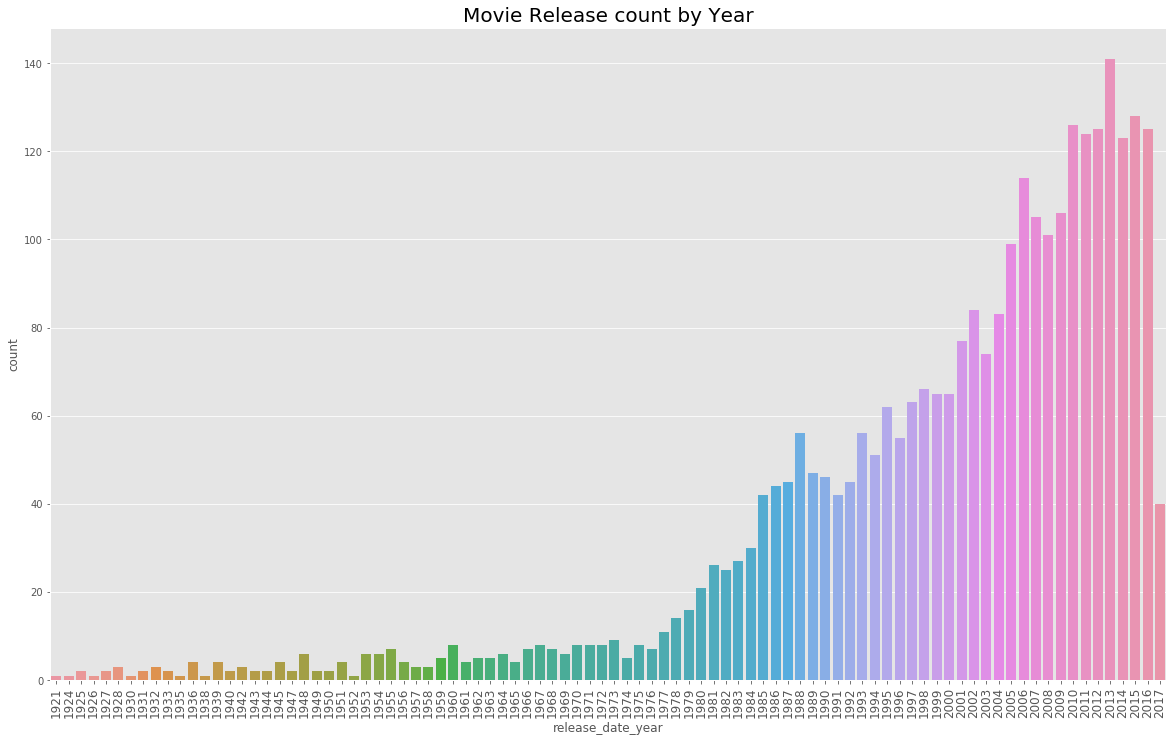

In [38]:
#countplot chart for movies release year
plt.figure(figsize=(20,12))
sns.countplot(df['release_date_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

We can see that since 2000s there are more movies that has been released.We can see that year 2013 has highes number of movie released i.e 140+ movie in a year.

In [39]:
#plot for release date vs revenue
d1 = df['release_date_year'].value_counts().sort_index()
d2 = df.groupby(['release_date_year'])['revenue'].mean()

data = [go.Scatter(x=d1.index, y=d1.values, name='film count'),
        go.Scatter(x=d2.index, y=d2.values, name='mean revenue', yaxis='y2')]

layout = go.Layout(dict(title = "Number of films and average revenue per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2=dict(title='Average revenue', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

From this chart we can see that graph of total revenue vs movie release count from the year 1930 to 2017

<font color='blue'>**Do release date affects revenue ?**</font>

we will be creating categorical plot as day of the week, month are not continuous data.

<Figure size 1440x360 with 0 Axes>

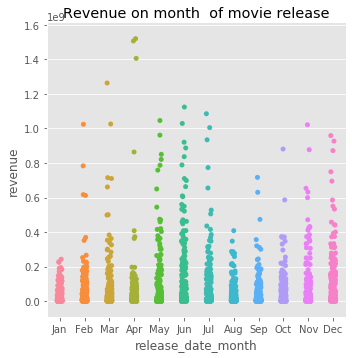

In [40]:
#since day, month are categorical variable
plt.figure(figsize=(20,5));
sns.catplot(x='release_date_month', y='revenue', data=df);
plt.title('Revenue on month  of movie release');
#lets replace number by actual month name
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=10)
plt.show()


From the above chart we can see that movie released in April has maximum revenue where as movie released in jan has less revenue compared to other months.

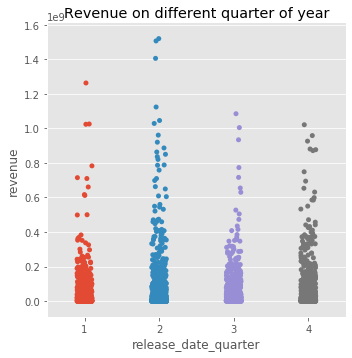

In [41]:
sns.catplot(x='release_date_quarter', y='revenue', data=df);
plt.title('Revenue on different quarter of year');

From the above chart we can see that movie released in second quarter (April-June) has more revenue compared to movie released in last quarter

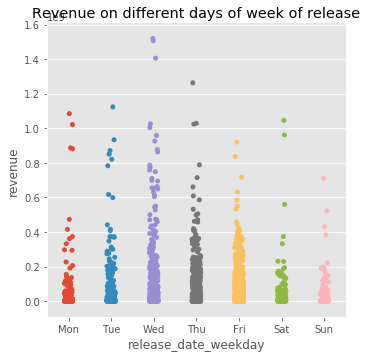

In [42]:
sns.catplot(x='release_date_weekday', y='revenue', data=df);
plt.title('Revenue on different days of week of release');
loc, labels = plt.xticks()
#putting label for days
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels)
plt.show()


Surprisingly movie released on wednesday and thursday has more revenue.

Well there seems to have correlation but it may not have one to one causal effect.

In [93]:
#top 20 movie by revenue
movies_20 =  df.sort_values(by='revenue', ascending=False).head(20)[['title','revenue','release_date_year']]

In [94]:
movies_20

,title,revenue,release_date_year
1126,The Avengers,1519557910,2012
1761,Furious 7,1506249360,2015
2770,Avengers: Age of Ultron,1405403694,2015
684,Beauty and the Beast,1262886337,2017
2322,Transformers: Dark of the Moon,1123746996,2011
906,The Dark Knight Rises,1084939099,2012
2135,Pirates of the Caribbean: On Stranger Tides,1045713802,2011
2562,Finding Dory,1028570889,2016
881,Alice in Wonderland,1025491110,2010
734,Zootopia,1023784195,2016


<font color='blue'>**Relation between runtime and revenue ?**</font>

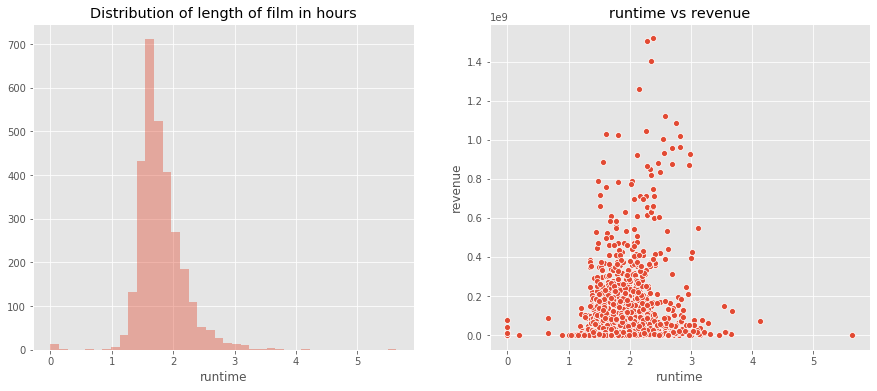

In [96]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(df['runtime'].fillna(0) / 60, bins=40, kde=False); #filling runtime with 0 if there were any missing values
plt.title('Distribution of length of film in hours');
plt.subplot(1, 2, 2)
sns.scatterplot(df['runtime'].fillna(0)/60, df['revenue'])
plt.title('runtime vs revenue');


Here we have run time in hour on x-axis and freq of movie in on y axis and then we cas see that most of the movie are between 1-3 hr.And the movie that fall on this duration has highest revenue.

<font color='blue'>**Find top genres from the movie list**</font>

In [45]:
# Apply the same preprocessing on the string values
df.genres = df.genres.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))
df.genres.head()

0                            [Comedy]
1    [Comedy, Drama, Family, Romance]
2                             [Drama]
3                   [Thriller, Drama]
4                  [Action, Thriller]
Name: genres, dtype: object

In [46]:
unique_genres = df["genres"].apply(pd.Series).stack().unique()
print("Number of genres: {}".format(len(unique_genres)))
print("Genres: {}".format(unique_genres))

Number of genres: 20
Genres: ['Comedy' 'Drama' 'Family' 'Romance' 'Thriller' 'Action' 'Animation'
 'Adventure' 'Horror' 'Documentary' 'Music' 'Crime' 'Science Fiction'
 'Mystery' 'Foreign' 'Fantasy' 'War' 'Western' 'History' 'TV Movie']


In [47]:
genres_dummies = pd.get_dummies(df["genres"].apply(pd.Series).stack()).sum(level=0) #one hot encoding
genres_dummies.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
train_genres = pd.concat([df, genres_dummies],axis=1, sort=False) #merging two data frame
train_genres.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,log_revenue,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.326300,16.454568,0,2015,4,2,8,20,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,18.370959,17.504390,0,2004,4,8,32,6,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,NaN,3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,16.387512,15.009433,1,2014,4,10,41,10,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,NaN,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,16.588099,13.997833,1,2012,4,3,10,9,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,NaN,0,"[Action, Thriller]",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,15.182615,0.000000,0,2009,3,2,6,5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


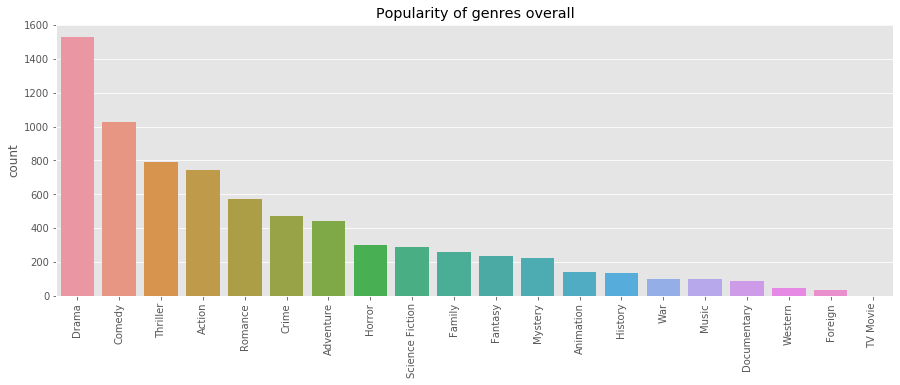

In [49]:
genres_overall = train_genres[unique_genres].sum().sort_values(ascending=False)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=genres_overall.index, y=genres_overall.values)
plt.xticks(rotation=90)
plt.title("Popularity of genres overall")
plt.ylabel("count")
plt.show()

We can see that , from above genre, Drama is more popular ad foreign movie are least popular.

<font color='blue'>**Model Prediction**</font>

In [50]:
train_genres.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_revenue', 'log_budget', 'has_homepage', 'release_date_year',
       'release_date_weekday', 'release_date_month', 'release_date_weekofyear',
       'release_date_day', 'release_date_quarter', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [51]:
#selecting the numeric column
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] #so that easy for us to perform  train and test
df_train=train_genres.select_dtypes(include=numerics)

In [52]:
#dropping the id coulmn
df_train.drop(columns=['id'],inplace=True) #we will be dropping ID
df_train=df_train.fillna(df_train.median()) #let's film the empty value with median of the data set

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
#selecting dataframe that is float,int
df_train.columns

Index(['budget', 'popularity', 'runtime', 'revenue', 'log_revenue',
       'log_budget', 'has_homepage', 'release_date_year',
       'release_date_weekday', 'release_date_month', 'release_date_weekofyear',
       'release_date_day', 'release_date_quarter', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

<font color='blue'>**Loading data from Training**</font>

In [54]:
#training the model
X = df_train.drop(['revenue', 'log_revenue'], axis=1)
y= df_train['revenue'] #prediction

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [64]:
#linear regression
lm = LinearRegression() #our 6th model
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)
print("R Square: ", r2_score(y_test, lm_preds))

R Square:  0.6202258487857504


Our R square value is 62%

In [59]:
#random forrest
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state =0, n_estimators=500, max_depth=10)
RF_model.fit(X_train, y_train)

y_hat = RF_model.predict(X_test)
print ("R-Squared is:", metrics.r2_score(y_hat, y_test))

R-Squared is: 0.5643712234342768


Our predicted from Random forest is 56% accurate.

                         importance
feature                            
budget                        0.306
log_budget                    0.299
popularity                    0.161
runtime                       0.043
release_date_year             0.033
release_date_weekofyear       0.032
release_date_day              0.027
release_date_weekday          0.014
release_date_month            0.012
has_homepage                  0.010
Adventure                     0.009
Animation                     0.007
Science Fiction               0.005
Comedy                        0.005
Drama                         0.004
Family                        0.004
Thriller                      0.004
Romance                       0.004
Fantasy                       0.004
Horror                        0.003
Crime                         0.003
Action                        0.003
release_date_quarter          0.003
Mystery                       0.002
Western                       0.002
Music                       

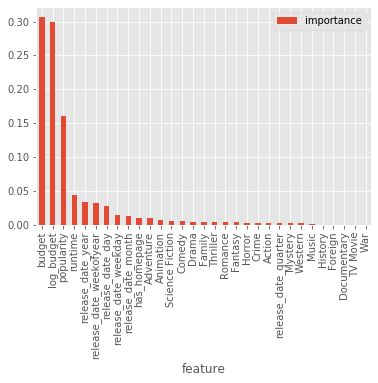

In [60]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(RF_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature');
print(importances)
importances.plot.bar();

We can see that Budget, popularity, runtime and release date of year (as release date of year is associated with population)has more weight on our feature.

### LGB MODEL

In [89]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

In [87]:
lgb_model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)

In [90]:
lgb_model.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

eli5.show_weights(lgb_model, feature_filter=lambda x: x != '<BIAS>')

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[767]	training's rmse: 5.49628e+07	valid_1's rmse: 8.52096e+07


Weight,Feature
0.5822,budget
0.1697,popularity
0.0823,log_budget
0.0563,runtime
0.0159,release_date_year
0.0143,release_date_weekday
0.0125,has_homepage
0.0123,Adventure
0.0102,release_date_weekofyear
0.0100,release_date_day


### GB regressor

In [65]:
#Gradient Boosting Regressor
# Fit regression model
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': .01, 'loss': 'ls'} 
clf = ensemble.GradientBoostingRegressor(**params)
predictions2 = clf.fit(X_train,y_train)
training_score = clf.score(X_train, y_train)
print(f"Training Score: {training_score}")



Training Score: 0.865629813071184


In [66]:
predictions2 = np.expand_dims(clf.predict(X_test), axis = 1)
MSE = mean_squared_error(y_test, predictions2)
r2 = clf.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 5471312048272168.0, R2: 0.6767814911469758


Our R square predicted from GB booster is quite better than other model with R square of 67%

In [69]:
#Predictions for the test data
revenue_predictions = clf.predict(X_test)
gbr_predictions = pd.DataFrame(revenue_predictions, columns = ['predicted_revenue'])
gbr_predictions.head()

,predicted_revenue
0,1.131428e+08
1,2.193659e+07
2,6.906060e+08
3,2.781506e+07
4,1.095287e+08


In [71]:
test_result = pd.concat([train_genres, gbr_predictions], axis = 1, sort=True)
#look at top values only
test_result = test_result[[ 'budget', 'popularity', 'release_date_year','release_date_month', 'revenue','predicted_revenue']]
test_result.head()

,budget,popularity,release_date_year,release_date_month,revenue,predicted_revenue
0,14000000,6.575393,2015,2,12314651,1.131428e+08
1,40000000,8.248895,2004,8,95149435,2.193659e+07
2,3300000,64.299990,2014,10,13092000,6.906060e+08
3,1200000,3.174936,2012,3,16000000,2.781506e+07
4,0,1.148070,2009,2,3923970,1.095287e+08


Here we can see reveune predicted from our testing model

## <font color='brown'>Conclusion</font>

Key Finding:

* Drama is the most popular genre, following by action, comedy and thriller.
* Maximum Number Of Movies Release In year 2013.
* Avenger', 'Furious7' and 'beauty and the beast' are the most profitable movies.
* Movie released on 2nd quarter of year has more revenue.
* Revenue is directly connected to the budget.
* Movies with higher budgets have shown a corresponding increase in the revenues.

HEre models were developed on a 3000 observation train dataset and test dataset, it’s limited to provide an accuracy results for a movie with unseen predictors. However, this is also an opportunity to improve modeling performance in the future by adding more observation in the training set. Furthermore, other features were not analyzed and included in predicting model, which are also analyzed and added-in for further improvement.

Another point that although random forest give better performance on RMSLE than other machine learning methods, its processing time is quite longer and might be limited if the training dataset is more bigger. For this reason, alternative machine learning methods are able to experiment to improve modeling speed in the future.

Our model demonstrates that it is possible to predict a movie’s reveune,using featured lable like release date, budget, popularity, runtime and so on. Movie industries can use the similar methods when producing movies that are more likely to be liked by the target audience.

However, the potential shortcoming is that our model’s predictive power is limited because the sample data is not representative. Therefore, a larger number of observations to capture more variability in the population data in our testing data set is required to have a better measure of the model’s accuracy.